In [36]:
"""
Task #1: This dataset outlines information for a variety of loan applications. It provides loan application data about the different variables that are taken into consideration when getting approved for a loan. This includes income, dependents, marital status, loan amount, and a variety of other variables. The target variable in this scenario would be the 'Loan_Status' variable. With this data, I would like to perdict whether an applicant will be approved or denied for a loan based on their application data. 
"""

"\nTask #1: This dataset outlines information for a variety of loan applications. It provides loan application data about the different variables that are taken into consideration when getting approved for a loan. This includes income, dependents, marital status, loan amount, and a variety of other variables. The target variable in this scenario would be the 'Loan_Status' variable. With this data, I would like to perdict whether an applicant will be approved or denied for a loan based on their application data. \n"

In [37]:
"""
Task #2:
Drop unwanted features.
Address missing values.
Remove Duplicates. 
Check if there are any inconsistent inputs for categorical variables. 
Transform categorical variables into numeric. 
Use boxplots or histogram to identify outliers for numeric variables and remove them.
"""
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("LoanApprovalPrediction.csv")
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [38]:
# Combine income columns into one column
loan_df['TotalApplicantIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

In [39]:
# Drop unwanted features
print(loan_df.shape)
loan_df = loan_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID', 'Loan_Amount_Term'], axis=1)
print(loan_df.shape)

"""
I dropped the 'ApplicantIncome' and 'CoapplicantIncome' columns because they have been combined into a single column 'TotalApplicantIncome'. 'Loan_Amount_Term' was dropped because all of the applications have the same loan term.
"""

(614, 14)
(614, 10)


"\nI dropped the 'ApplicantIncome' and 'CoapplicantIncome' columns because they have been combined into a single column 'TotalApplicantIncome'. 'Loan_Amount_Term' was dropped because all of the applications have the same loan term.\n"

In [40]:
# Replace the rows that have null values with 0.
loan_df = loan_df.fillna(0)

In [41]:
# Transform categorical variables into numeric values
loan_df['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
loan_df['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
loan_df['Dependents'].replace(['3+'], [3], inplace=True)
loan_df['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)
loan_df['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
loan_df['Property_Area'].replace(['Urban', 'Semiurban', 'Rural'], [0, 1, 2], inplace=True)
loan_df['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)

In [42]:
# Check data types
print(loan_df.dtypes)

# The data type of 'Dependents' is currently an object. It should be an integer.
loan_df['Dependents'].value_counts()
loan_df['Dependents'] = loan_df['Dependents'].astype('int')

Gender                    int64
Married                   int64
Dependents               object
Education                 int64
Self_Employed             int64
LoanAmount              float64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
TotalApplicantIncome    float64
dtype: object


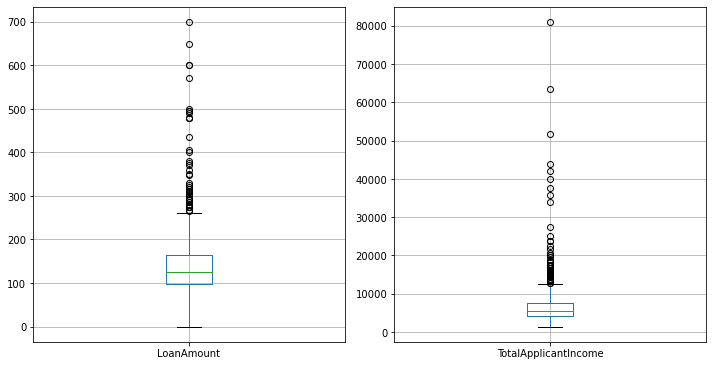

In [43]:
# Get all numerical columns and creates figure
column_list = ['LoanAmount', 'TotalApplicantIncome']
fig = plt.figure(figsize = (10, 10))

# Build the subplots and structure output
for i in range(len(column_list)):
    column = column_list[i]
    sub = fig.add_subplot(2, 2, i + 1)
    loan_df.boxplot(column = [column])
    
fig.tight_layout() 
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

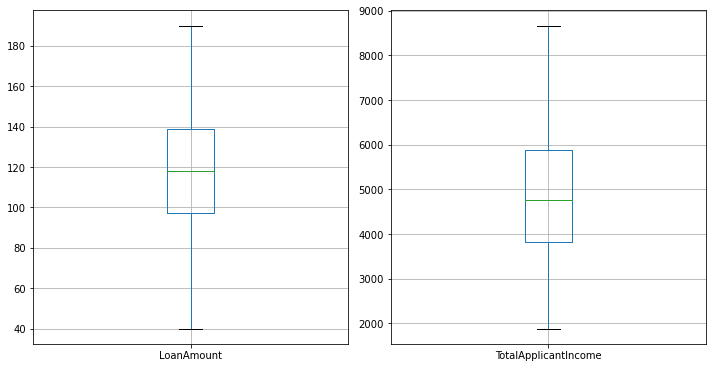

(443, 10)


'\nRemoved all of the outlier values outside of the upper and lower boxplot whiskers for each numerical feauture.\n'

In [44]:
# Remove outliers
loan_df = loan_df[loan_df['LoanAmount'] <= 190]
loan_df = loan_df[loan_df['LoanAmount'] >= 40]

loan_df = loan_df[loan_df['TotalApplicantIncome'] <= 8700]

# Build the subplots and structure output
column_list = ['LoanAmount', 'TotalApplicantIncome']
fig = plt.figure(figsize=(10, 10))

for i in range(len(column_list)):
    column = column_list[i]
    sub = fig.add_subplot(2, 2, i + 1)
    loan_df.boxplot(column = [column])
    
fig.tight_layout() 
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

print(loan_df.shape)

"""
Removed all of the outlier values outside of the upper and lower boxplot whiskers for each numerical feauture.
"""

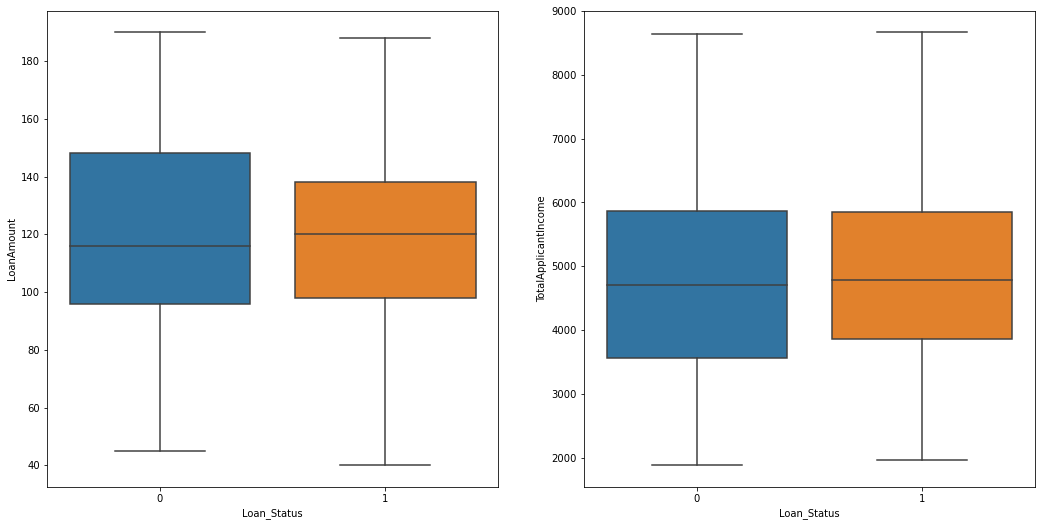

"\nBoth 'LoanAmount' and 'TotalApplicantIncome' only show a slight variance between those approved and those not approved for a loan.\n"

In [45]:
"""
Task #3:
Use graphs, ANOVA test, Chi-squared test to reduce the dimension. 
Any variables with zero to little variance?  
Any features Irrelevant to the target variable? 
Any high-correlated Features?  
Does this algorithm require normalized data or standardized data?
"""
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np

# Generate boxplots for all the numerical features vs. the target variable.
column_list = ['LoanAmount', 'TotalApplicantIncome']
fig = plt.figure(figsize=(10, 8))

for i in range(len(column_list)):
    column = column_list[i]
    sub = fig.add_subplot(2, 2, i+1)
    sns.boxplot(x = 'Loan_Status', y = column, data = loan_df)
    
fig.tight_layout() 
fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

"""
Both 'LoanAmount' and 'TotalApplicantIncome' only show a slight variance between those approved and those not approved for a loan.
"""

In [46]:
# Sets the x and y variables 
x = loan_df.loc[:, ['LoanAmount', 'TotalApplicantIncome']]
y = loan_df.loc[:, 'Loan_Status']

# Calculates k-best
fs = SelectKBest(score_func = f_classif, k = 'all')

# Trains the model
bestFeatures = fs.fit(x, y) 
np.set_printoptions(suppress = True)

# Prints out the scores for numerical features 
print('F Scores: ' + str(bestFeatures.scores_))
print('P-Values: ' + str(bestFeatures.pvalues_))

# Drop variables where p-value is higher than 0.05
print(loan_df.shape)
loan_df = loan_df.drop(['LoanAmount', 'TotalApplicantIncome'], axis=1)
print(loan_df.shape)

F Scores: [0.26128572 0.65616307]
P-Values: [0.60949403 0.41835468]
(443, 10)
(443, 8)


'\nCredit history is the only feature that seems to show a significant difference between the number of people who were approved for a loan and those who were not between its two categories. All of the other features seem to have a common probability of getting approved between their categories. \n'

<Figure size 720x576 with 0 Axes>

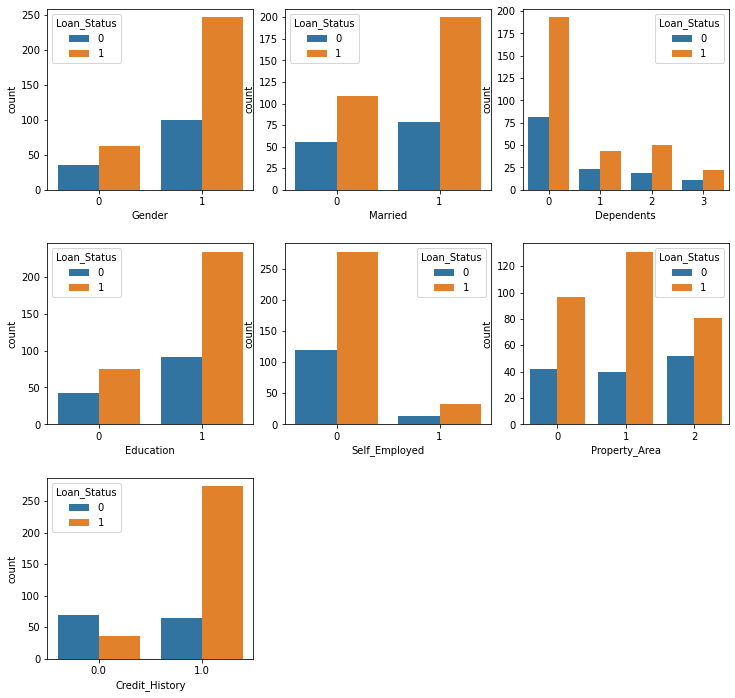

In [47]:
# Gets all categorical columns and creates figure
cat_list = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
fig = plt.figure(figsize = (10, 8))

# Builds the subplots and structure output
fig = plt.figure(figsize = (16,8))
for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(3, 3, i + 1)
    chart = sns.countplot(x = column, hue = 'Loan_Status', data = loan_df)
    
fig.tight_layout() 
fig.set_figheight(10)
fig.set_figwidth(10)

"""
Credit history is the only feature that seems to show a significant difference between the number of people who were approved for a loan and those who were not between its two categories. All of the other features seem to have a common probability of getting approved between their categories. 
"""

In [48]:
# Gets x and y variables 
x = loan_df.loc[:, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']]
y = loan_df.loc[:, 'Loan_Status']

# Chi-squared test
chi = SelectKBest(score_func = chi2, k = 'all')
catFeatures = chi.fit(x, y)

# Prints out the scores for categorical features 
print('F Scores: ' + str(catFeatures.scores_))
print('P-Values: ' + str(catFeatures.pvalues_))

# Drop variables where p-value is higher than 0.05
print(loan_df.shape)
loan_df = loan_df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)
print(loan_df.shape)

F Scores: [ 0.39419681  0.49404308  0.0652108   0.77864367  0.00075813  1.51398901
 19.44598609]
P-Values: [0.53010159 0.4821293  0.79844193 0.37755627 0.97803363 0.21853141
 0.00001035]
(443, 8)
(443, 2)


In [49]:
"""
Task #4: Build the prediction model.
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Splits the data 
x = loan_df.loc[:, loan_df.columns!='Loan_Status']
y = loan_df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)   

"""
I am using train_test_split to validate the result. 
"""

'\nI am using train_test_split to validate the result. \n'

In [50]:
# Checks if the dataset is balanced
for column in loan_df:
     print(loan_df[column].value_counts())

"""
The dataset is not balanced. The features have a significantly higher count for certain values than others. This means I need to balance the data. 
"""

1.0    338
0.0    105
Name: Credit_History, dtype: int64
1    309
0    134
Name: Loan_Status, dtype: int64


'\nThe dataset is not balanced. The features have a significantly higher count for certain values than others. This means I need to balance the data. \n'

In [51]:
# Balances the data set
os = SMOTE(random_state = 0)
oversampled_x, oversampled_y = os.fit_sample(x_train, y_train)

# Prints shape following balance 
print(x_train.shape)
print(oversampled_x.shape)

(354, 1)
(494, 1)


In [52]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Build the logistic regression prediction model
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

# Evaluates the model and gets accuracy score 
test_pred = LogRegression.predict(x_test)
print(accuracy_score(y_test, test_pred))

"""
I am using the logistic regression model for this problem. This is the appropriate algorithm as it helps topredict the probability of an event occuring.
"""

0.7752808988764045


'\nI am using the logistic regression model for this problem. This is the appropriate algorithm as it helps topredict the probability of an event occuring.\n'

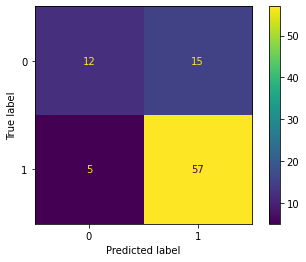

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gets confusin matrix to check performance of model
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)